## Importing Libraries

In [20]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.image import resize
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
file = "blues.00000.wav"

## Visualizing Audio

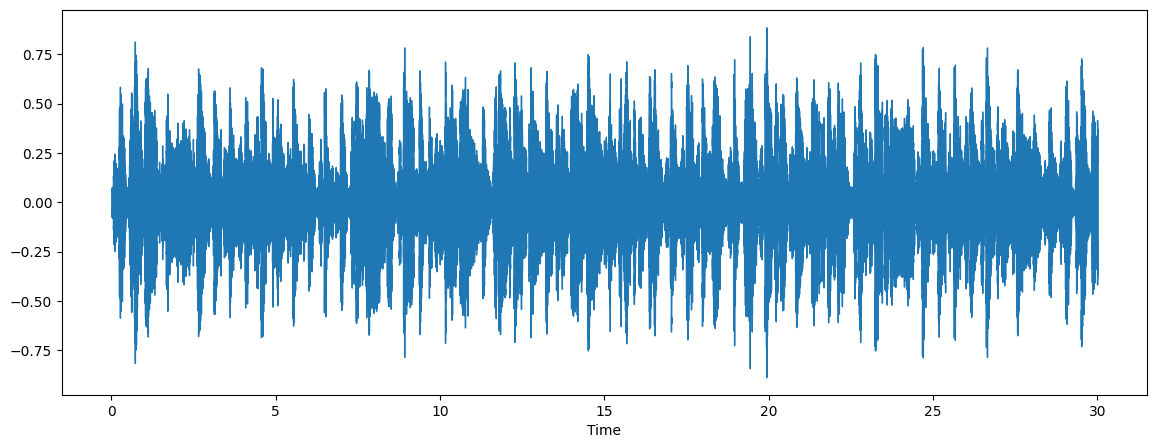

In [4]:
y,sr = librosa.load(file,sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y,sr=sr)

## Playing Sound

In [5]:
from IPython.display import Audio
Audio(data=y,rate=sr)

## Visulisation of chunks of audio

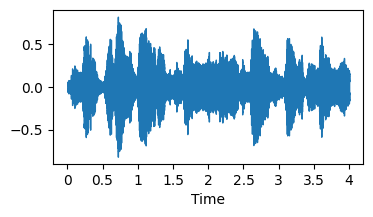

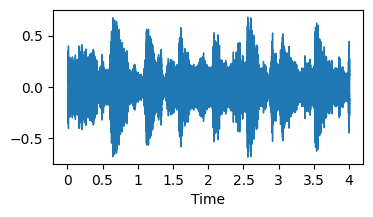

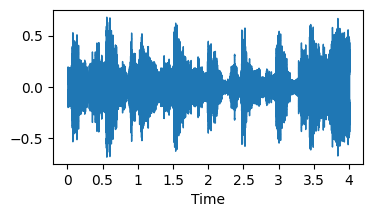

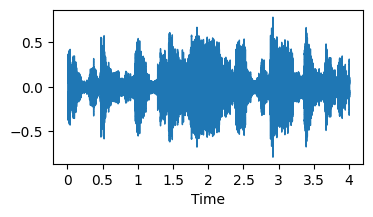

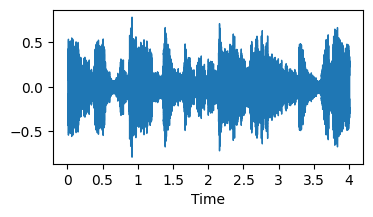

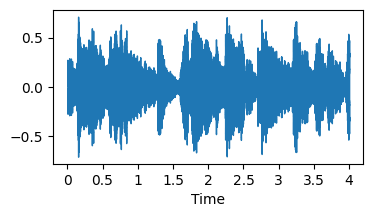

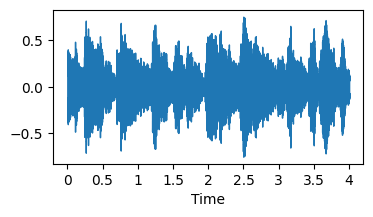

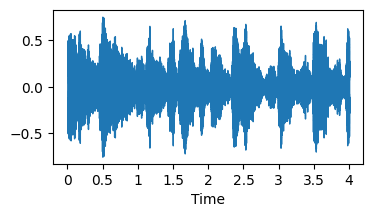

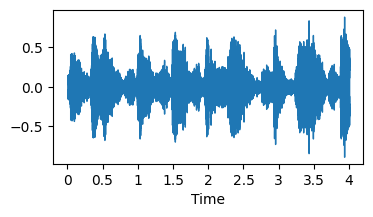

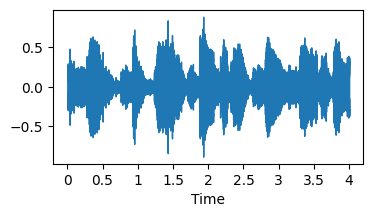

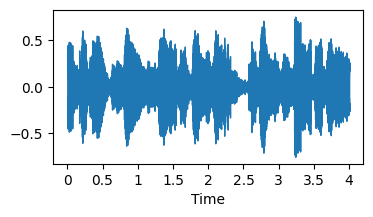

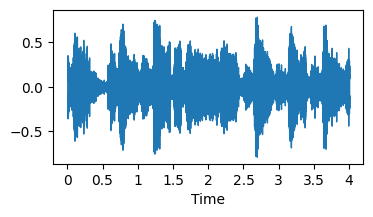

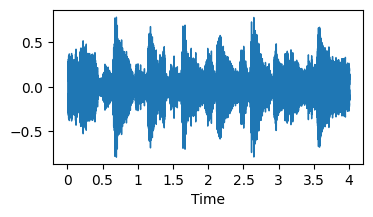

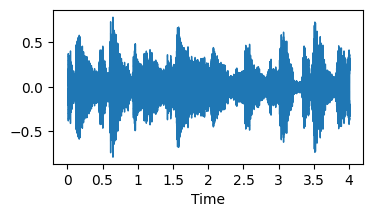

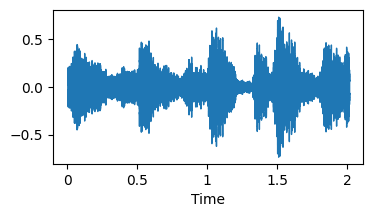

In [6]:
#duration of each chunk and overlap
chunk_duration = 4
overlap_duration = 2

#convert duration to sample
chunk_sample = chunk_duration* sr
overlap_sample = overlap_duration*sr

#Calculate number of chunk
num_chunks =  int(np.ceil((len(y)-chunk_sample)/(chunk_sample-overlap_sample)))+1
#Itrate over each chunks
for i in range (num_chunks):
    start = i*(chunk_sample-overlap_sample)
    end = start+chunk_sample
    #Extract the chunk
    chunk = y[start:end]
    plt.figure(figsize =(4,2))
    librosa.display.waveshow(chunk,sr=sr)
    plt.show()
    

## Melspectogram Visulization

In [7]:
#plotting mel spectogram of entire audio
def plot_melspectogram(y,sr):
    #COMPUTE SPECTOGRAM
    spectogram = librosa.feature.melspectrogram(y=y,sr=sr)
    #CONVERT TO DB
    spectogram_db = librosa.power_to_db(spectogram,ref = np.max)
    #visulize spectogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectogram_db,sr=sr,x_axis = 'time',y_axis ='mel')
    plt.colorbar(format = '%2.0f dB')
    plt.title("Spectogram")
    plt.tight_layout()
    plt.show()
    

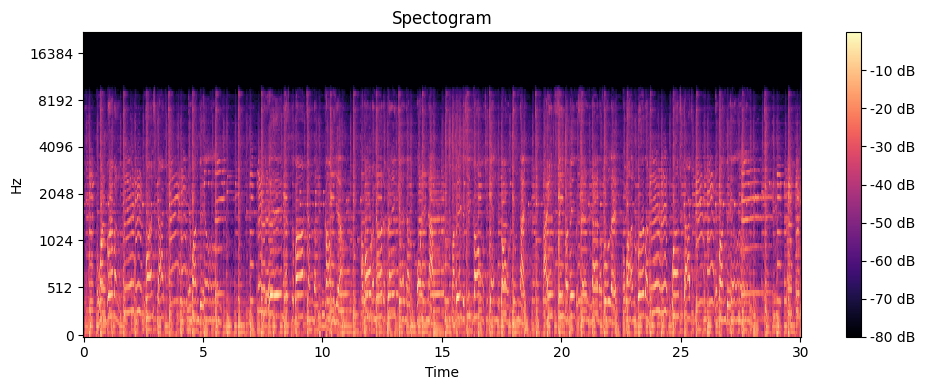

In [8]:
plot_melspectogram(y,sr)

In [9]:
def plot_melspectogram_chunks(y,sr):
    chunk_duration = 4
    overlap_duration = 2

    #convert duration to sample
    chunk_sample = chunk_duration* sr
    overlap_sample = overlap_duration*sr

    #Calculate number of chunk
    num_chunks =  int(np.ceil((len(y)-chunk_sample)/(chunk_sample-overlap_sample)))+1
    #Itrate over each chunks
    for i in range (num_chunks):
        start = i*(chunk_sample-overlap_sample)
        end = start+chunk_sample
        #Extract the chunk
        chunk = y[start:end]
        melspectogram = librosa.feature.melspectrogram(y=chunk,sr=sr)
        print(melspectogram.shape)
        melspectogram_db = librosa.power_to_db(melspectogram,ref = np.max)
        plt.figure(figsize=(10,4))
        librosa.display.specshow(melspectogram_db,sr=sr,x_axis = 'time',y_axis ='mel')
        plt.colorbar(format = '%2.0f dB')
        plt.title("Spectogram")
        plt.tight_layout()
        plt.show()
    

(128, 345)


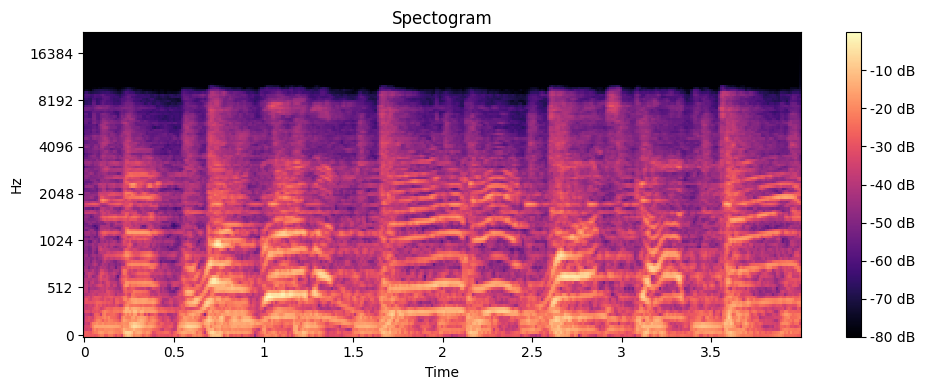

(128, 345)


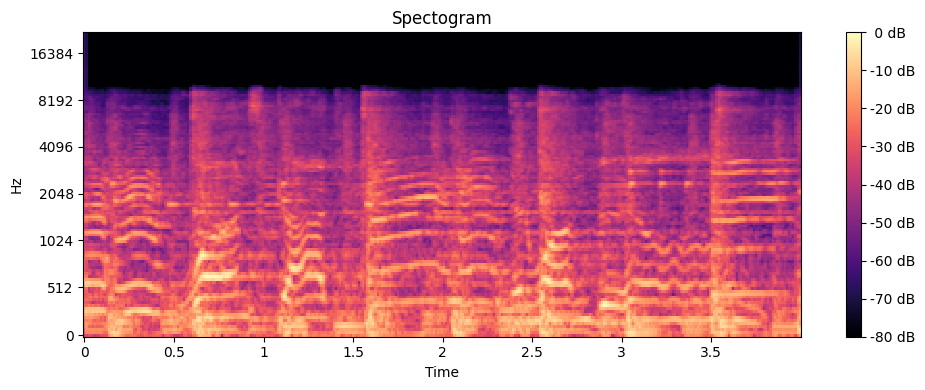

(128, 345)


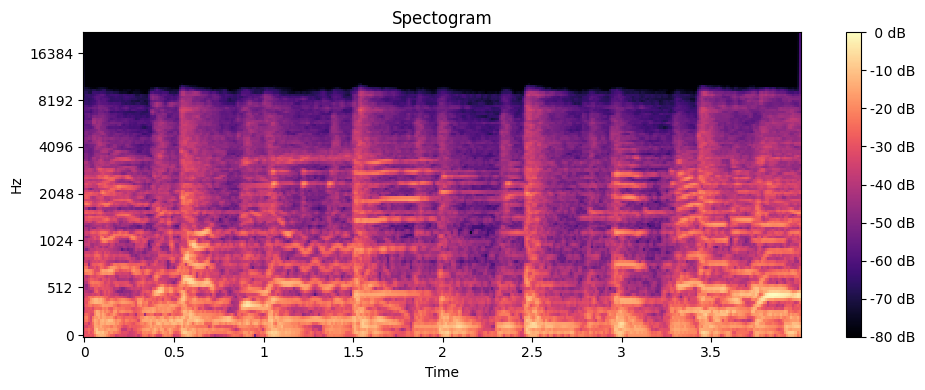

(128, 345)


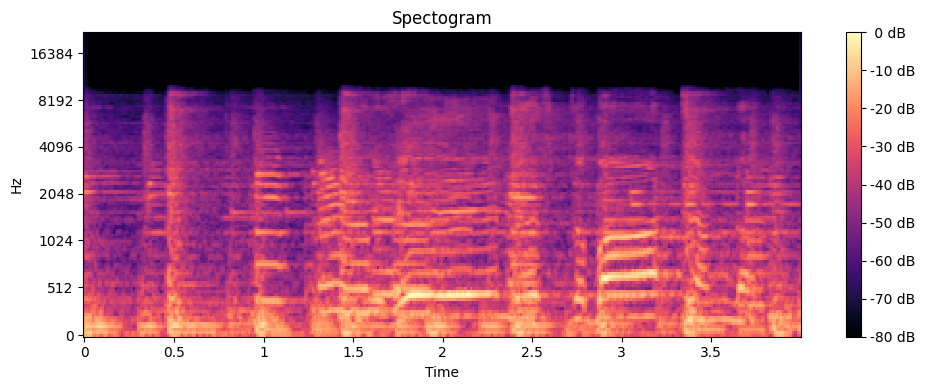

(128, 345)


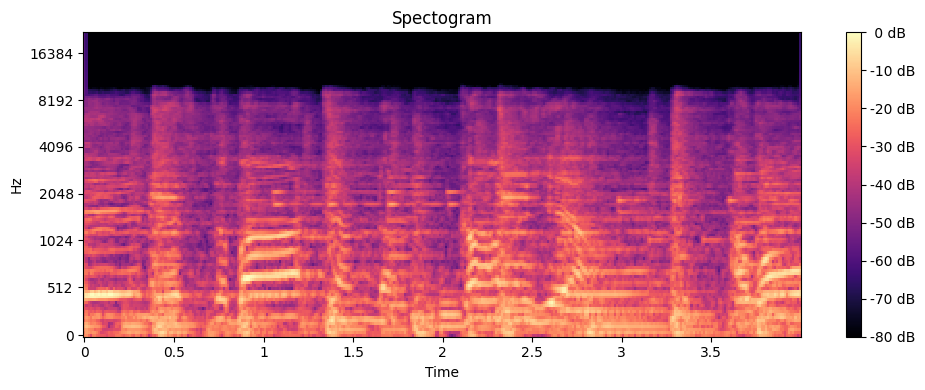

(128, 345)


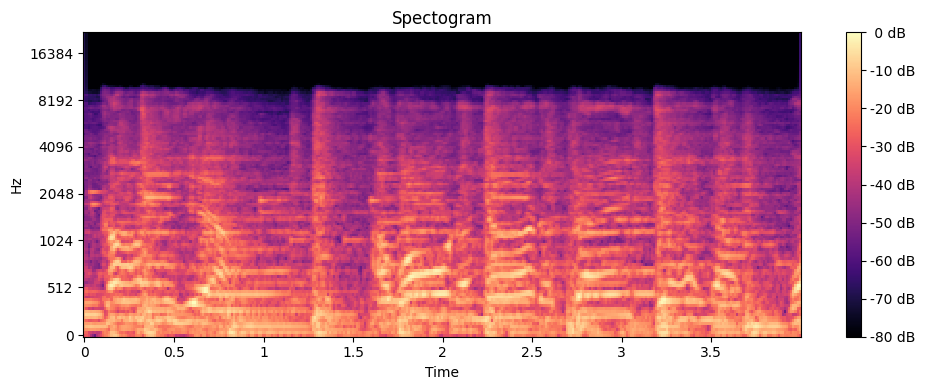

(128, 345)


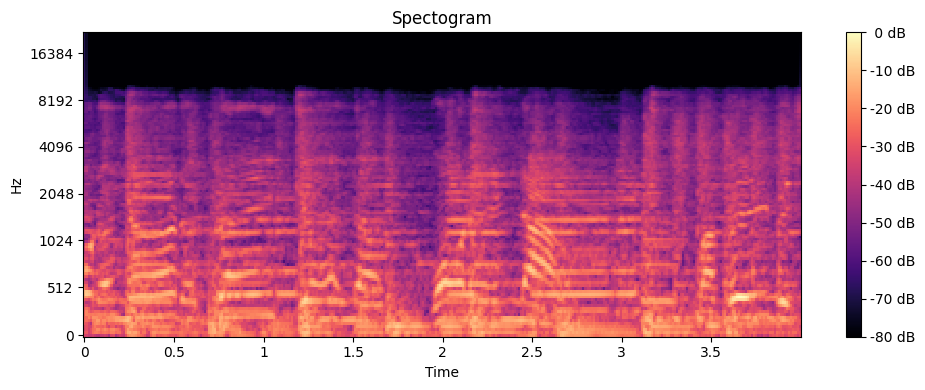

(128, 345)


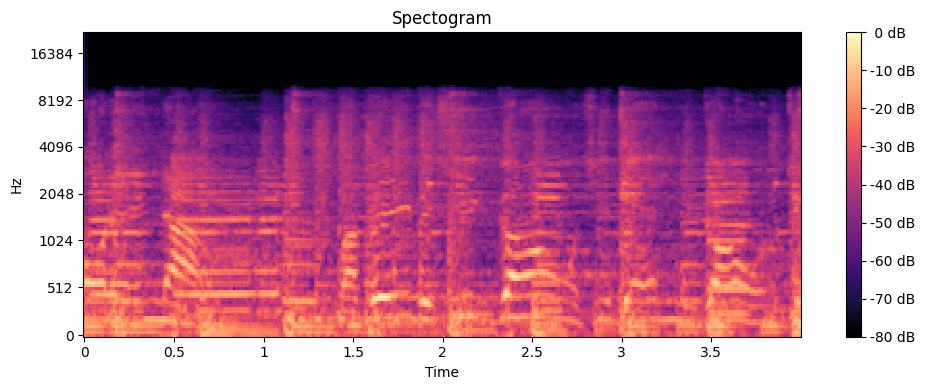

(128, 345)


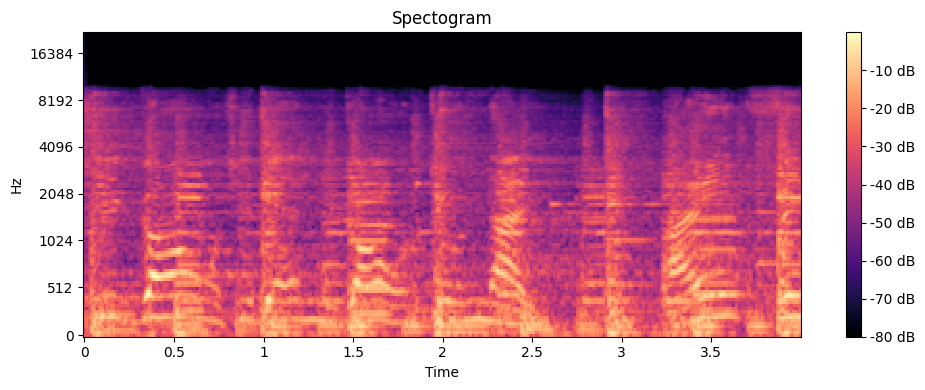

(128, 345)


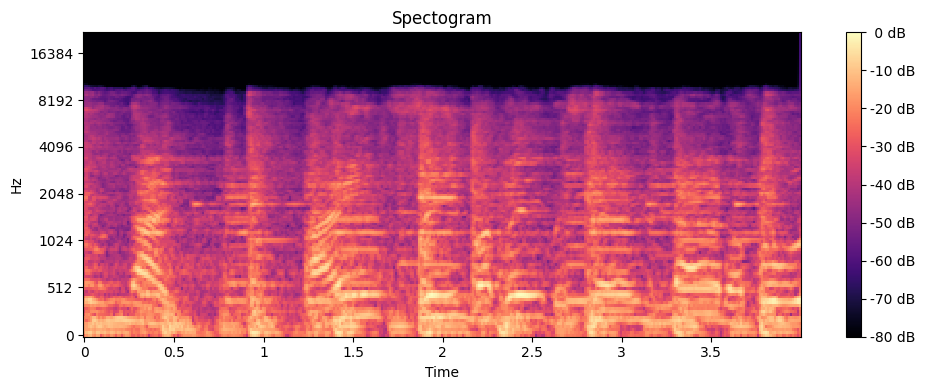

(128, 345)


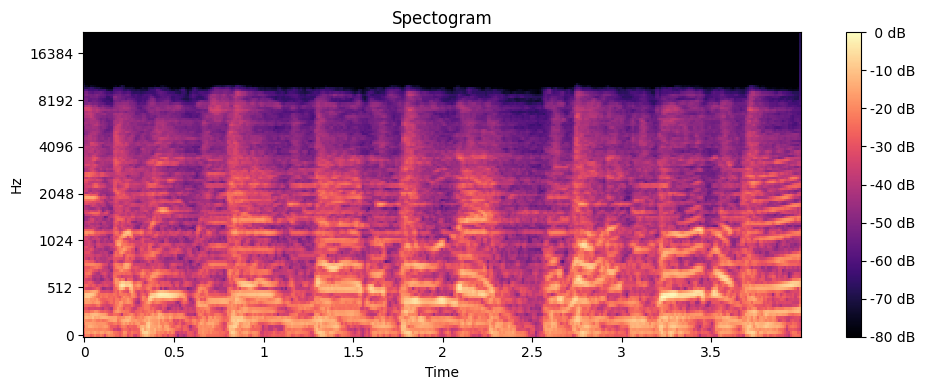

(128, 345)


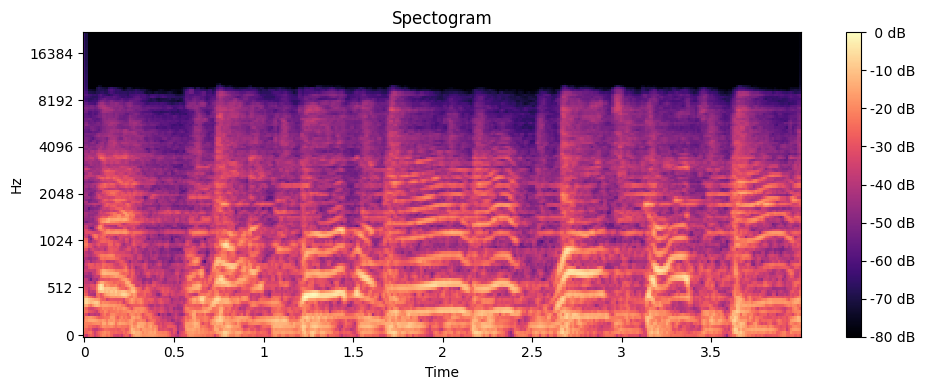

(128, 345)


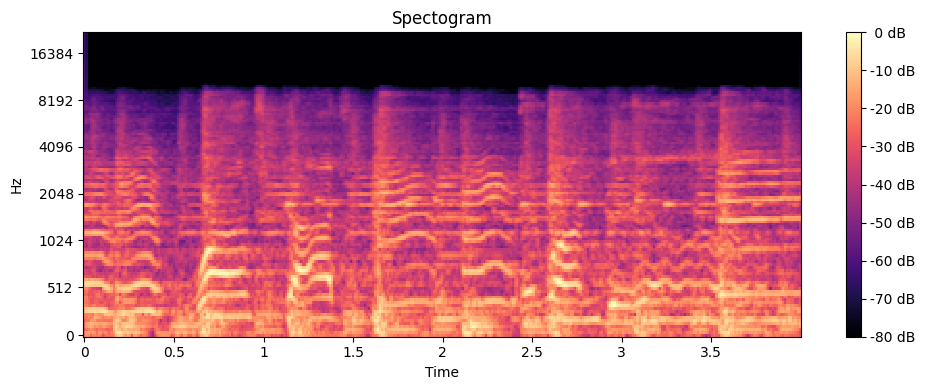

(128, 345)


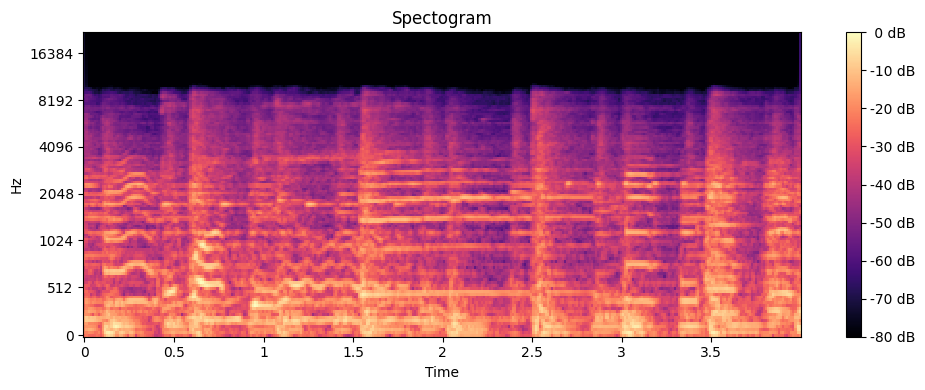

(128, 174)


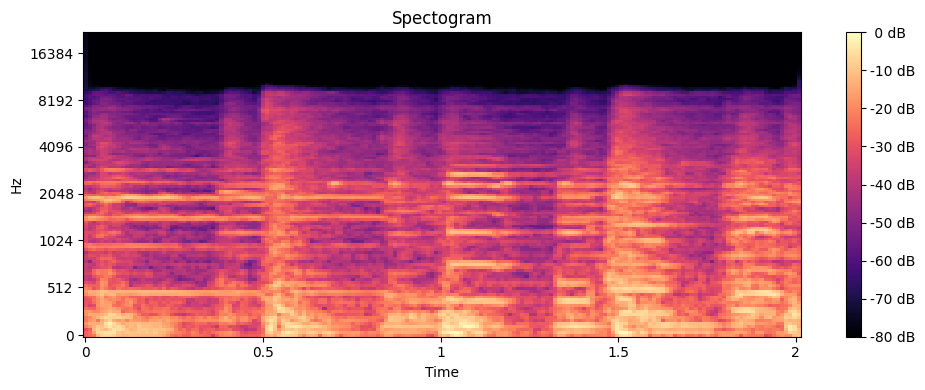

In [10]:
plot_melspectogram_chunks(y,sr)

## Data PreProcessing - final(Whole data)

In [11]:
data_dir = "./Data"
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [45]:
#Load and Preprocess data
def load_and_preprocess_data(data_dir,classes,target_shape=(150,150)):
    data=[]
    labels=[]

    for i_class,class_name in enumerate(classes):
        class_dir =  os.path.join(data_dir,class_name)
        print("Preprocessing--",class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir,filename)
                audio_data,sample_rate = librosa.load(file_path,sr=None)
                #Performing Preprocessing
                chunk_duration = 4
                overlap_duration = 2
            
                #convert duration to sample
                chunk_sample = chunk_duration* sample_rate
                overlap_sample = overlap_duration*sample_rate
            
                #Calculate number of chunk
                num_chunks =  int(np.ceil((len(audio_data)-chunk_sample)/(chunk_sample-overlap_sample)))+1
                #Itrate over each chunks
                for i in range (num_chunks):
                    start = i*(chunk_sample-overlap_sample)
                    end = start+chunk_sample
                    #Extract the chunk
                    chunk = audio_data[start:end]
                    mel_spectogram = librosa.feature.melspectrogram(y=chunk,sr=sample_rate)
                    #Resize matrix to 150,150
                    mel_spectogram = resize(np.expand_dims(mel_spectogram,axis=-1),target_shape)
                    #Append data into the list
                    data.append(mel_spectogram)
                    labels.append(i_class)
    #return
    return np.array(data),np.array(labels)

In [46]:
data,labels = load_and_preprocess_data(data_dir,classes)

Preprocessing-- blues
Preprocessing-- classical
Preprocessing-- country
Preprocessing-- disco
Preprocessing-- hiphop
Preprocessing-- jazz
Preprocessing-- metal
Preprocessing-- pop
Preprocessing-- reggae
Preprocessing-- rock


In [47]:
data.shape

(14975, 150, 150, 1)

In [48]:
labels.shape

(14975,)

In [49]:
labels =  to_categorical(labels,num_classes=len(classes))

## Splitting of dataset into training and test set

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=42)

In [51]:
X_train.shape

(11980, 150, 150, 1)

## Building Model

In [52]:
model = tf.keras.models.Sequential()

In [53]:
X_train[0].shape

(150, 150, 1)

In [54]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = X_train[0].shape))#First layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))#Second layer
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Users\JB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [56]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [57]:
model.add(Dropout(0.3))

In [58]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [59]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [60]:
model.add(Dropout(0.3))

In [61]:
model.add(Flatten())

In [62]:
model.add(Dense(units=1200,activation='relu'))

In [63]:
model.add(Dropout(0.45))

In [64]:
##Output layer
model.add(Dense(units=len(classes),activation='softmax'))

In [65]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 73, 73, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 7,182,458 (27.40 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
#Compilation
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [71]:
training_history = model.fit(X_train,Y_train,epochs=30,batch_size=32,validation_data=(X_test,Y_test))

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 358s 946ms/step - accuracy: 0.2017 - loss: 2.1502 - val_accuracy: 0.4334 - val_loss: 1.6044
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 342s 913ms/step - accuracy: 0.4482 - loss: 1.5549 - val_accuracy: 0.5666 - val_loss: 1.2378
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 328s 874ms/step - accuracy: 0.5720 - loss: 1.2071 - val_accuracy: 0.6624 - val_loss: 0.9926
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 334s 890ms/step - accuracy: 0.6583 - loss: 1.0021 - val_accuracy: 0.7062 - val_loss: 0.8663
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 331s 881ms/step - accuracy: 0.7126 - loss: 0.8489 - val_accuracy: 0.6985 - val_loss: 0.8516
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 330s 879ms/step - accuracy: 0.7481 - loss: 0.7465 - val_accuracy: 0.7629 - val_loss: 0.7256
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 326s 869ms/step - accuracy: 0.7805 - loss: 0.6375 - val_accuracy: 0.7970 - val_loss: 0.6136
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 334s 892ms/step - accuracy: 0.8237 -

In [72]:
model.save("Trained_model.h5") #Windows

In [73]:
model.save("Trained_model.keras")

In [74]:
training_history.history

{'accuracy': [0.2679465711116791,
  0.4757095277309418,
  0.5993322134017944,
  0.668948233127594,
  0.7133556008338928,
  0.7544240355491638,
  0.789232075214386,
  0.8251252174377441,
  0.8530049920082092,
  0.8741235136985779,
  0.8927379250526428,
  0.9014190435409546,
  0.9232053160667419,
  0.92938232421875,
  0.9404006600379944,
  0.941652774810791,
  0.951669454574585,
  0.9576794505119324,
  0.9593489170074463,
  0.9610183835029602,
  0.9652754664421082,
  0.965442419052124,
  0.9706177115440369,
  0.9774624109268188,
  0.9771285653114319,
  0.9727879762649536,
  0.9804674386978149,
  0.9796327352523804,
  0.9811352491378784,
  0.9816360473632812],
 'loss': [1.984109878540039,
  1.4592490196228027,
  1.1525717973709106,
  0.9713590145111084,
  0.8357516527175903,
  0.7224770188331604,
  0.6167439818382263,
  0.5192385315895081,
  0.44159674644470215,
  0.3752579092979431,
  0.3195185959339142,
  0.29521870613098145,
  0.22954267263412476,
  0.21506087481975555,
  0.18065531551

In [75]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [76]:
#Reloading model variable
model = tf.keras.models.load_model("Trained_model.keras")
model.summary()

C:\Users\JB\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 26 variables whereas the saved optimizer has 50 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 73, 73, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 36, 36, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 34, 34, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 17, 17, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 5, 5, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1200)                │       2,458,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          12,010 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,364,918 (54.80 MB)

 Trainable params: 7,182,458 (27.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,182,460 (27.40 MB)

In [77]:
#Reloading Training history
import json
with open("training_hist.json",'r') as json_file:
    training_history_data = json.load(json_file)

In [78]:
training_history_data.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Model Evaluation - I Accuracy and loss Visulization

In [79]:
#Model evaluation on Training set
train_loss,train_accuracy = model.evaluate(X_train,Y_train)

375/375 ━━━━━━━━━━━━━━━━━━━━ 70s 186ms/step - accuracy: 0.9950 - loss: 0.0189


In [80]:
train_loss,train_accuracy

(0.017748914659023285, 0.9954090118408203)

In [81]:
#Model evaluation on Validation set
val_loss,val_accuracy = model.evaluate(X_test,Y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 0.9133 - loss: 0.3847


In [82]:
val_loss,val_accuracy

(0.38658690452575684, 0.9128547310829163)

### Accuracy and loss Visulization

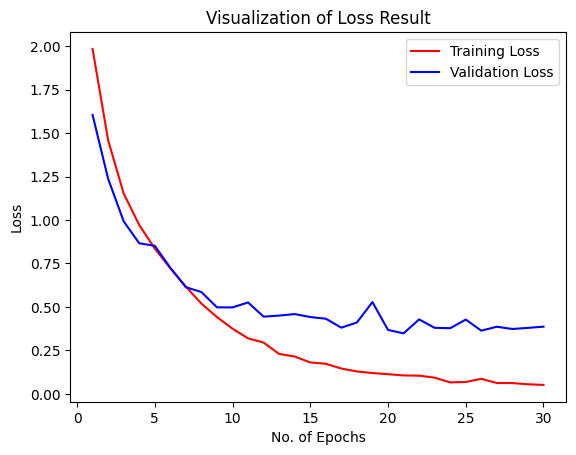

In [83]:
#Visualization of Loss
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['loss'],label="Training Loss",color='red')
plt.plot(epochs,training_history_data['val_loss'],label="Validation Loss",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Loss")
plt.title("Visualization of Loss Result")
plt.legend()
plt.show()

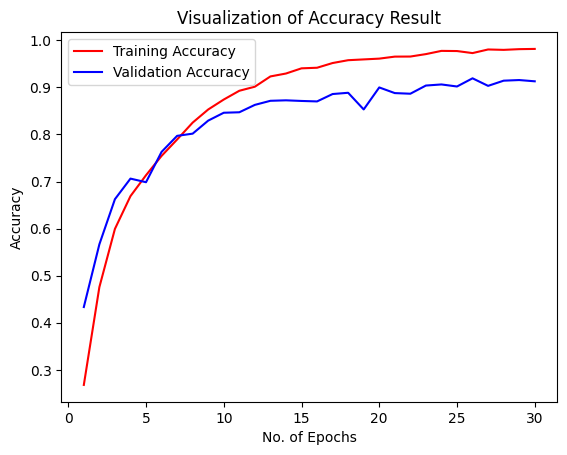

In [84]:
#Visualization of Accuracy
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history_data['accuracy'],label="Training Accuracy",color='red')
plt.plot(epochs,training_history_data['val_accuracy'],label="Validation Accuracy",color='blue')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

## Model Evaluation - II Precision,Recall,Confusion Matrix

### Precision and Recall

In [85]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 180ms/step


array([[2.5892765e-03, 4.5291322e-06, 6.3348591e-04, ..., 9.7941625e-01,
        2.3203482e-05, 1.6502660e-02],
       [2.0274894e-10, 9.4826166e-17, 9.6332609e-11, ..., 1.5940368e-15,
        4.1142132e-14, 8.4444100e-06],
       [3.0925210e-12, 7.8448234e-14, 1.4247899e-10, ..., 3.2434281e-11,
        1.4955866e-14, 5.3138781e-04],
       ...,
       [1.0000000e+00, 4.6017334e-21, 1.6287437e-10, ..., 5.2547509e-18,
        2.5973279e-15, 9.0725048e-14],
       [3.9463438e-02, 5.1717967e-01, 1.7902236e-02, ..., 4.6157107e-02,
        1.4637733e-01, 1.6436145e-02],
       [4.2016845e-04, 1.9196888e-07, 9.7595062e-04, ..., 3.4840126e-02,
        9.6247430e-05, 1.5834915e-02]], dtype=float32)

In [86]:
predicted_categories = np.argmax(y_pred,axis=1)
predicted_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [87]:
true_categories = np.argmax(Y_test,axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [88]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.92      0.91      0.92       302
   classical       0.96      0.96      0.96       298
     country       0.83      0.88      0.85       317
       disco       0.93      0.93      0.93       312
      hiphop       0.94      0.96      0.95       277
        jazz       0.87      0.96      0.91       311
       metal       0.99      0.96      0.97       302
         pop       0.88      0.89      0.89       289
      reggae       0.98      0.83      0.90       296
        rock       0.86      0.83      0.84       291

    accuracy                           0.91      2995
   macro avg       0.92      0.91      0.91      2995
weighted avg       0.91      0.91      0.91      2995



### Confusion Matrix Visualization

In [89]:
cm

array([[276,   0,  10,   3,   0,  10,   0,   0,   0,   3],
       [  1, 286,   2,   0,   0,   7,   0,   1,   0,   1],
       [  7,   1, 278,   2,   0,  11,   0,   6,   0,  12],
       [  3,   1,   1, 291,   3,   0,   0,   5,   1,   7],
       [  0,   1,   0,   4, 266,   2,   2,   0,   1,   1],
       [  1,   5,   5,   0,   0, 300,   0,   0,   0,   0],
       [  1,   0,   4,   0,   0,   2, 290,   0,   0,   5],
       [  4,   3,   7,   0,   7,   2,   0, 258,   2,   6],
       [  6,   0,  12,   6,   3,   7,   1,   9, 247,   5],
       [  2,   2,  16,   6,   4,   5,   1,  13,   0, 242]], dtype=int64)

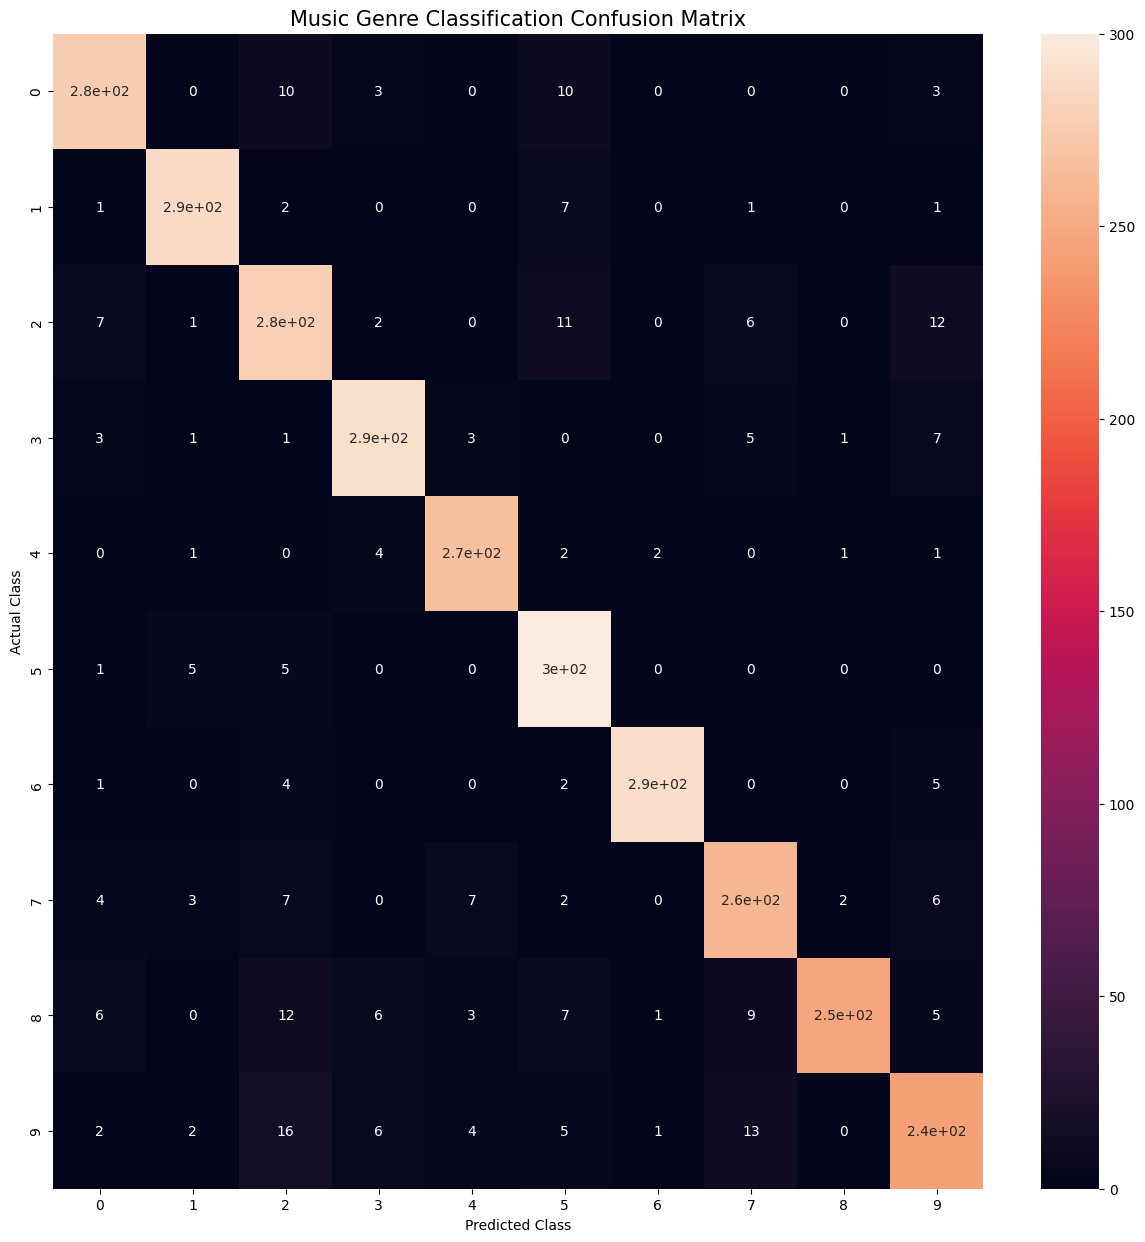

In [92]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Music Genre Classification Confusion Matrix",fontsize=15)
plt.show()